In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_investors = pd.read_csv('./data/Investor.csv', header=None, sep = '\t')
df_investors = df_investors.rename(columns = {0:'investorID', 1:'investorname'})
df_valueinvestor = pd.read_csv('./data/valueinvestorname.txt', names = {'investorname'})
df_valueinvestor = df_valueinvestor.append(df_investors[df_investors['investorname'].str.contains('VALUE')][['investorname']], ignore_index = True)
df_valueinvestor = df_valueinvestor.drop_duplicates()
df_hits = pd.read_csv('./data/hits.csv', sep = '\t') #read the result of HITs analysis
df_PRanks = pd.read_csv('./data/PRanks.csv', sep = '\t') #read the result of page rank analysis
df_partition  = pd.read_csv('./data/df_partition.csv',  sep = '\t') #read the result of Louvain community detection
df_meanInvestStats = pd.read_csv('./data/meanInvestStats.csv',  sep = '\t') #read average return and holding periods of investor

In [3]:
df_investor_stats = df_investors.merge(df_PRanks, on = ['investorID'], how='left')
df_investor_stats = df_investor_stats.merge(df_hits, on = ['investorID'], how='left')
df_investor_stats = df_investor_stats.merge(df_partition, on = ['investorID'], how='left')
df_investor_stats = df_investor_stats.merge(df_meanInvestStats, on = ['investorID'], how='left')
df_valueinvestor_stats = df_valueinvestor.merge(df_investor_stats, on = ['investorname'], how='left')

In [4]:
df_investor_stats.head()

,investorID,investorname,PRank,Auth,Hub,community,holding_period,quarterly_return
0,0,1 NORTH WEALTH SERVICES LLC,0.000028,NaN,NaN,NaN,1.766667,0.067345
1,1,1015 ASSOCIATES INC,0.000361,0.017298,0.018282,0.0,9.081081,0.010933
2,2,1060 CAPITAL LLC,0.000029,0.000479,0.000000,NaN,1.416149,0.023228
3,3,12 WEST CAPITAL MANAGEMENT LP,0.000080,0.014031,0.001539,8.0,4.606742,0.012793
4,4,12TH STREET ASSET MANAGEMENT COMPANY LLC,0.000337,0.012231,0.013338,0.0,6.666667,0.010946


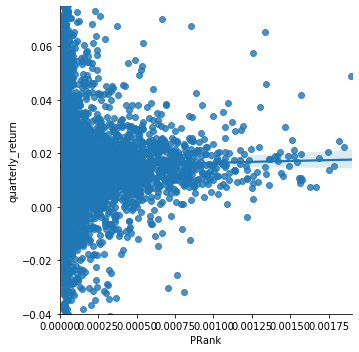

In [5]:
g = sns.lmplot(x='PRank',y='quarterly_return',data=df_investor_stats,fit_reg=True)
g = g.set(xlim=(0.00, 0.0019),ylim=(-0.04, 0.075) )

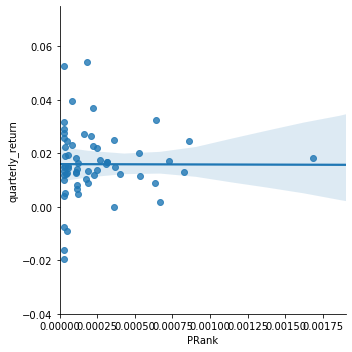

In [6]:
g = sns.lmplot(x='PRank',y='quarterly_return',data=df_valueinvestor_stats,fit_reg=True)
g = g.set(xlim=(0.0, 0.0019),ylim=(-0.04, 0.075))

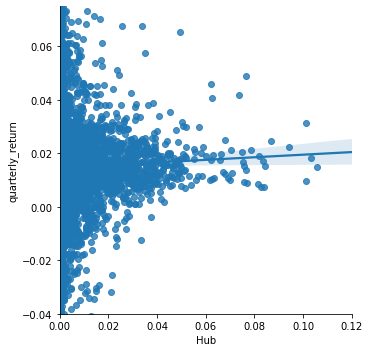

In [7]:
g = sns.lmplot(x='Hub',y='quarterly_return',data=df_investor_stats,fit_reg=True)
g = g.set(xlim=(0.00, 0.12),ylim=(-0.04, 0.075) )

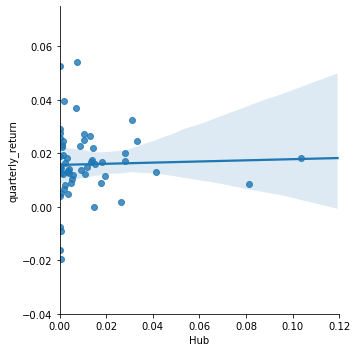

In [8]:
g = sns.lmplot(x='Hub',y='quarterly_return',data=df_valueinvestor_stats,fit_reg=True)
g = g.set(xlim=(0.000, 0.12),ylim=(-0.04, 0.075) )

In [10]:
df_valueinvestor_stats = df_valueinvestor_stats[df_valueinvestor_stats.community.notnull()]
df_valueinvestor_stats.community = df_valueinvestor_stats.community.astype(int)
df_investor_stats = df_investor_stats[df_investor_stats.community.notnull()]
df_investor_stats.community = df_investor_stats.community.astype(int)

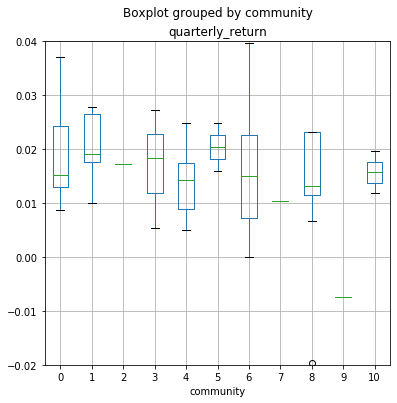

In [11]:
axes = df_valueinvestor_stats.boxplot(column = 'quarterly_return', by = 'community', figsize = (6,6), return_type = 'axes')
for ax in axes.values:
    ax.set_ylim(-0.02, 0.04)
plt.show()

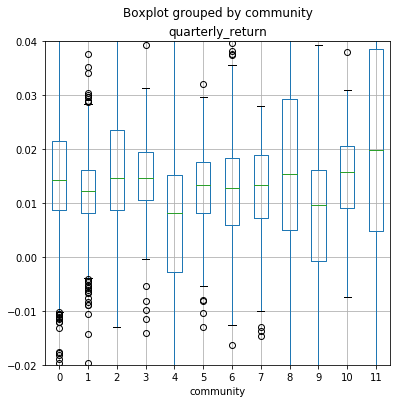

In [12]:
axes = df_investor_stats.boxplot(column = 'quarterly_return', by = 'community', figsize = (6,6), return_type = 'axes')
for ax in axes.values:
    ax.set_ylim(-0.02, 0.04)
plt.show()

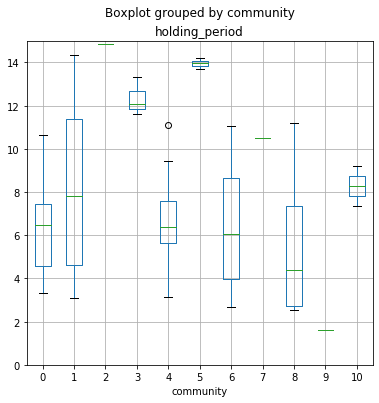

In [13]:
axes = df_valueinvestor_stats.boxplot(column = 'holding_period', by = 'community', figsize = (6,6), return_type = 'axes')
for ax in axes.values:
    ax.set_ylim(0, 15)
plt.show()

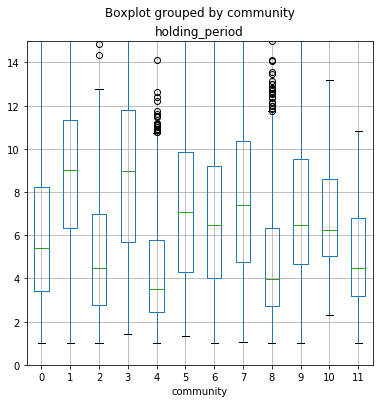

In [14]:
axes = df_investor_stats.boxplot(column = 'holding_period', by = 'community', figsize = (6,6), return_type = 'axes')
for ax in axes.values:
    ax.set_ylim(0, 15)
plt.show()

In [17]:
df_valueinvestor_stats[df_valueinvestor_stats['community'] == 3]

,investorname,investorID,PRank,Auth,Hub,community,holding_period,quarterly_return
9,MARKEL CORP,3251.0,0.000165,0.010220,0.010435,3,11.632184,0.027165
27,HORIZON KINETICS LLC,2523.0,0.000034,0.011805,0.000436,3,13.329268,0.005298
42,COHO PARTNERS LTD,1229.0,0.001687,0.011833,0.103401,3,12.054054,0.018376


In [18]:
df_valueinvestor_stats[df_valueinvestor_stats['community'] == 5]

,investorname,investorID,PRank,Auth,Hub,community,holding_period,quarterly_return
0,BERKSHIRE HATHAWAY INC,648.0,0.000860,0.014643,0.033161,5,13.679012,0.024722
35,BOYAR ASSET MANAGEMENT INC,774.0,0.000307,0.018914,0.015117,5,14.219298,0.015901
